In [2]:
### 1. Import Modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#### Dicts
n_dict = {'z_39':39, 'z_52':52, 'z_65':65, 'z_78':78, 'z_91':91, 'z_104':104}

m_dict = {'m_1':1,'m_2':2,'m_3':3,'m_4':4,'m_5':5,
               'm_6':6,'m_7':7,'m_8':8,'m_9':9,'m_10':10,
               'm_11':11,'m_12':12,'m_13':13}

In [5]:
### 2. Load in SMI, format and shift dates and SMI

In [6]:
df_SMI_39 = pd.read_csv('data/df_smi_39')
df_SMI_52 = pd.read_csv('data/df_smi_52')
df_SMI_65 = pd.read_csv('data/df_smi_65')
df_SMI_78 = pd.read_csv('data/df_smi_78')
df_SMI_91 = pd.read_csv('data/df_smi_91')
df_SMI_104 = pd.read_csv('data/df_smi_104')

In [7]:
df_SMI_39.report_date = pd.to_datetime(df_SMI_39.report_date)
df_SMI_52.report_date = pd.to_datetime(df_SMI_52.report_date)
df_SMI_65.report_date = pd.to_datetime(df_SMI_65.report_date)
df_SMI_78.report_date = pd.to_datetime(df_SMI_78.report_date)
df_SMI_91.report_date = pd.to_datetime(df_SMI_91.report_date)
df_SMI_104.report_date = pd.to_datetime(df_SMI_104.report_date)
 
df_SMI_39['report_date'] =  df_SMI_39.report_date + pd.DateOffset(days=3)
df_SMI_52['report_date'] =  df_SMI_52.report_date + pd.DateOffset(days=3)
df_SMI_65['report_date'] =  df_SMI_65.report_date + pd.DateOffset(days=3)
df_SMI_78['report_date'] =  df_SMI_78.report_date + pd.DateOffset(days=3)
df_SMI_91['report_date'] =  df_SMI_91.report_date + pd.DateOffset(days=3)
df_SMI_104['report_date'] = df_SMI_104.report_date + pd.DateOffset(days=3)
 
df_SMI_39['report_date'] = df_SMI_39.report_date.dt.strftime('%Y%m%d')
df_SMI_52['report_date'] = df_SMI_52.report_date.dt.strftime('%Y%m%d')
df_SMI_65['report_date'] = df_SMI_65.report_date.dt.strftime('%Y%m%d')
df_SMI_78['report_date'] = df_SMI_78.report_date.dt.strftime('%Y%m%d')
df_SMI_91['report_date'] = df_SMI_91.report_date.dt.strftime('%Y%m%d')
df_SMI_104['report_date'] = df_SMI_104.report_date.dt.strftime('%Y%m%d')
 
df_SMI_39.report_date = df_SMI_39.report_date.astype('str')
df_SMI_52.report_date = df_SMI_52.report_date.astype('str')
df_SMI_65.report_date = df_SMI_65.report_date.astype('str')
df_SMI_78.report_date = df_SMI_78.report_date.astype('str')
df_SMI_91.report_date = df_SMI_91.report_date.astype('str')
df_SMI_104.report_date = df_SMI_104.report_date.astype('str')
 
df_SMI_39 = df_SMI_39.set_index('report_date')
df_SMI_52 = df_SMI_52.set_index('report_date')
df_SMI_65 = df_SMI_65.set_index('report_date')
df_SMI_78 = df_SMI_78.set_index('report_date')
df_SMI_91 = df_SMI_91.set_index('report_date')
df_SMI_104 = df_SMI_104.set_index('report_date')
 
df_SMI_39 = df_SMI_39.shift(1)
df_SMI_52 = df_SMI_52.shift(1)
df_SMI_65 = df_SMI_65.shift(1)
df_SMI_78 = df_SMI_78.shift(1)
df_SMI_91 = df_SMI_91.shift(1)
df_SMI_104 = df_SMI_104.shift(1)


### 3. Load in SPX Data

In [8]:
### Read CSV and calculate weekly returns

df_SPX_price = pd.read_csv('data/spx.csv')

df_SPX_price['stock_return'] = 1 + ((df_SPX_price.Close.shift(-5) - df_SPX_price.Close) / df_SPX_price.Close)
df_SPX_price['Date'] = pd.to_datetime(df_SPX_price.Date)
df_SPX_price['Date'] = df_SPX_price.Date.dt.strftime('%Y%m%d')
df_SPX_price= df_SPX_price.set_index('Date')

In [9]:
stock_rets = df_SPX_price

### 4. Merge dfs with returns

In [10]:
df_SMI_39 = df_SMI_39.merge(stock_rets,how='left',left_index=True,right_index=True)
df_SMI_52 = df_SMI_52.merge(stock_rets,how ='left',left_index=True,right_index=True)
df_SMI_65 = df_SMI_65.merge(stock_rets,how ='left',left_index=True,right_index=True)
df_SMI_78 = df_SMI_78.merge(stock_rets,how ='left',left_index=True,right_index=True)
df_SMI_91 = df_SMI_91.merge(stock_rets,how ='left',left_index=True,right_index=True)
df_SMI_104 = df_SMI_104.merge(stock_rets,how ='left',left_index=True,right_index=True)

In [11]:
### 5. Cumulative Return Full Range
np.prod(df_SMI_78['stock_return'])

5.93681610016326

In [12]:
### 6. Subset the Range 

In [13]:
df_SMI_78_subset = df_SMI_78[df_SMI_78.index > '19951222']

In [23]:
df_SMI_78_subset = df_SMI_78_subset[df_SMI_78_subset.index < '2018']

In [24]:
### 6. Cumulative Return of Subset
np.prod(df_SMI_78_subset.stock_return)

3.8029653199563245

In [25]:
### SMI+ 
np.prod(df_SMI_78_subset.stock_return[df_SMI_78_subset.z_78_m_5 >= 0])

8.253866468843425

In [26]:
### SMI-
np.prod(df_SMI_78_subset.stock_return[df_SMI_78_subset.z_78_m_5 < 0])

0.46074955710898585

In [38]:
neg_return = df_SMI_78_subset.stock_return[df_SMI_78_subset.z_78_m_5 < 0]

In [39]:
pos_return = df_SMI_78_subset.stock_return[df_SMI_78_subset.z_78_m_5 >= 0]

In [40]:
return_chart = pd.DataFrame(index=df_SMI_78_subset.index)

In [41]:
return_chart.insert(loc=0,column='neg',value=neg_return)

In [42]:
return_chart.insert(loc=0,column='pos',value=pos_return)

In [43]:
return_chart.insert(loc=0,column='smi',value=df_SMI_78_subset.z_78_m_5)

In [44]:
return_chart = return_chart.fillna(1)

In [45]:
return_chart.negraw = return_chart.pos
return_chart.posraw = return_chart.pos

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [46]:
return_chart.pos = return_chart.pos.cumprod()
return_chart.neg = return_chart.neg.cumprod()

In [47]:
return_chart.to_csv('data/return_chart.csv')

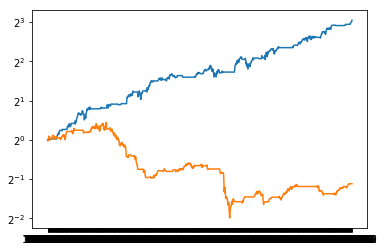

In [48]:
plt.plot(return_chart.pos)
plt.plot(return_chart.neg)
plt.yscale('log', basey=2)
plt.show()

### 7 Create Table of Pos and Neg returns

In [51]:
df_SMI_39_v2=df_SMI_39
df_SMI_52_v2=df_SMI_52
df_SMI_65_v2=df_SMI_65
df_SMI_78_v2=df_SMI_78
df_SMI_91_v2=df_SMI_91
df_SMI_104_v2=df_SMI_104



df_smi_list = [df_SMI_39_v2,
df_SMI_52_v2,
df_SMI_65_v2,
df_SMI_78_v2,
df_SMI_91_v2,
df_SMI_104_v2]


for df in df_smi_list:
    df.columns = ['SMI_1','SMI_2','SMI_3','SMI_4','SMI_5',\
                  'SMI_6','SMI_7','SMI_8','SMI_9','SMI_10','SMI_11','SMI_12','SMI_13',\
                 'Open','High','Low','Close','Adj Close','Volume','stock_return']

In [52]:
df_SMI_39_v2.head()

,SMI_1,SMI_2,SMI_3,SMI_4,SMI_5,SMI_6,SMI_7,SMI_8,SMI_9,SMI_10,SMI_11,SMI_12,SMI_13,Open,High,Low,Close,Adj Close,Volume,stock_return
report_date,,,,,,,,,,,,,,,,,,,,
19941223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,459.700012,461.320007,459.390015,459.829987,459.829987,196540000.0,0.998434
19941230,-2.661773,-1.727126,-1.807001,-0.909582,-0.965223,-1.050301,-0.609957,0.273015,0.174473,0.062718,0.261557,0.251876,-0.669381,461.170013,462.119995,459.239990,459.269989,459.269989,256260000.0,1.003397
19950106,-1.735274,-2.130446,-1.532127,-1.559632,-1.280420,-1.134389,-1.063635,-0.713464,0.118485,0.044706,0.000000,0.177846,0.080663,460.380005,462.489990,459.470001,460.679993,460.679993,308070000.0,1.011483
19950113,-1.463540,-1.494444,-1.668285,-1.105001,-1.473994,-0.839351,-0.856113,-1.019742,-0.820494,0.044706,-0.009006,-0.043856,0.030643,461.640015,466.429993,461.640015,465.970001,465.970001,336740000.0,0.997446
19950120,-2.230178,-2.147109,-1.823614,-1.838415,-1.629388,-1.583292,-0.883920,-0.985900,-1.079270,-0.950260,0.000000,-0.055453,-0.215068,466.950012,466.989990,463.989990,464.779999,464.779999,378190000.0,1.012070


In [53]:
smi_1_rets_neg = {'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_1 < 0]),
              '52_weeks':np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_1 < 0]),
              '65_weeks':np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_1 < 0]),
              '78_weeks':np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_1 < 0]),
              '91_weeks':np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_1 < 0]),
              '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_1 < 0]),
             }

smi_2_rets_neg ={'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_2 < 0]),
             '52_weeks':np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_2 < 0]),
             '65_weeks':np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_2 < 0]),
             '78_weeks':np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_2 < 0]),
             '91_weeks':np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_2 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_2 < 0]),
            }

smi_3_rets_neg ={'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_3 < 0]),
             '52_weeks':np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_3 < 0]),
             '65_weeks':np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_3 < 0]),
             '78_weeks':np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_3 < 0]),
             '91_weeks':np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_3 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_3 < 0]),
            }

smi_4_rets_neg = {'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_4 < 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_4 < 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_4 < 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_4 < 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_4 < 0]),
              '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_4 < 0]),
            }

smi_5_rets_neg = {'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_5 < 0]),
              '52_weeks':np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_5 < 0]),
              '65_weeks':np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_5 < 0]),
              '78_weeks':np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_5 < 0]),
              '91_weeks':np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_5 < 0]),
              '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_5 < 0]),
            }

smi_6_rets_neg ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_6 < 0]),
             '52_weeks':  np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_6 < 0]),
             '65_weeks':  np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_6 < 0]),
             '78_weeks':  np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_6 < 0]),
             '91_weeks':  np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_6 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_6 < 0]),
            }

smi_7_rets_neg ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_7 < 0]),
             '52_weeks':  np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_7 < 0]),
             '65_weeks':  np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_7 < 0]),
             '78_weeks':  np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_7 < 0]),
             '91_weeks':  np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_7 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_7 < 0]),
            }

smi_8_rets_neg ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_8 < 0]),
             '52_weeks':  np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_8 < 0]),
             '65_weeks':  np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_8 < 0]),
             '78_weeks':  np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_8 < 0]),
             '91_weeks':  np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_8 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_8 < 0]),
            }

smi_9_rets_neg ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_9 < 0]),
             '52_weeks':  np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_9 < 0]),
             '65_weeks':  np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_9 < 0]),
             '78_weeks':  np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_9 < 0]),
             '91_weeks':  np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_9 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_9 < 0]),
            }

smi_10_rets_neg ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_10 < 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_10 < 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_10 < 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_10 < 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_10 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_10 < 0]),
            }

smi_11_rets_neg ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_11 < 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_11 < 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_11 < 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_11 < 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_11 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_11 < 0]),
            }

smi_12_rets_neg ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_12 < 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_12 < 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_12 < 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_12 < 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_12 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_12 < 0]),
                }

smi_13_rets_neg ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_13 < 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_13 < 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_13 < 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_13 < 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_13 < 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_13 < 0]),
            }

df_rets_neg = pd.DataFrame(columns=['39_weeks','52_weeks','65_weeks','78_weeks','91_weeks','104_weeks'])

rets_neg = [smi_1_rets_neg,smi_2_rets_neg,smi_3_rets_neg,smi_4_rets_neg,
        smi_5_rets_neg,smi_6_rets_neg,smi_7_rets_neg,smi_8_rets_neg,
        smi_9_rets_neg,smi_10_rets_neg,smi_11_rets_neg,smi_12_rets_neg,
        smi_13_rets_neg]

for series in rets_neg:
    df_rets_neg = df_rets_neg.append(series,ignore_index=True)


In [54]:
smi_1_rets_pos = {'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_1 >= 0]),
              '52_weeks':np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_1 >= 0]),
              '65_weeks':np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_1 >= 0]),
              '78_weeks':np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_1 >= 0]),
              '91_weeks':np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_1 >= 0]),
              '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_1 >= 0]),
             }

smi_2_rets_pos ={'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_2 >= 0]),
             '52_weeks':np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_2 >= 0]),
             '65_weeks':np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_2 >= 0]),
             '78_weeks':np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_2 >= 0]),
             '91_weeks':np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_2 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_2 >= 0]),
            }

smi_3_rets_pos ={'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_3 >= 0]),
             '52_weeks':np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_3 >= 0]),
             '65_weeks':np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_3 >= 0]),
             '78_weeks':np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_3 >= 0]),
             '91_weeks':np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_3 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_3 >= 0]),
            }

smi_4_rets_pos = {'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_4 >= 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_4 >= 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_4 >= 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_4 >= 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_4 >= 0]),
              '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_4 >= 0]),
            }

smi_5_rets_pos = {'39_weeks':np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_5 >= 0]),
              '52_weeks':np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_5 >= 0]),
              '65_weeks':np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_5 >= 0]),
              '78_weeks':np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_5 >= 0]),
              '91_weeks':np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_5 >= 0]),
              '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_5 >= 0]),
            }

smi_6_rets_pos ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_6 >= 0]),
             '52_weeks':  np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_6 >= 0]),
             '65_weeks':  np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_6 >= 0]),
             '78_weeks':  np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_6 >= 0]),
             '91_weeks':  np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_6 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_6 >= 0]),
            }

smi_7_rets_pos ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_7 >= 0]),
             '52_weeks':  np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_7 >= 0]),
             '65_weeks':  np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_7 >= 0]),
             '78_weeks':  np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_7 >= 0]),
             '91_weeks':  np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_7 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_7 >= 0]),
            }

smi_8_rets_pos ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_8 >= 0]),
             '52_weeks':  np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_8 >= 0]),
             '65_weeks':  np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_8 >= 0]),
             '78_weeks':  np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_8 >= 0]),
             '91_weeks':  np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_8 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_8 >= 0]),
            }

smi_9_rets_pos ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_9 >= 0]),
             '52_weeks':  np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_9 >= 0]),
             '65_weeks':  np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_9 >= 0]),
             '78_weeks':  np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_9 >= 0]),
             '91_weeks':  np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_9 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_9 >= 0]),
            }

smi_10_rets_pos ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_10 >= 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_10 >= 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_10 >= 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_10 >= 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_10 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_10 >= 0]),
            }

smi_11_rets_pos ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_11 >= 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_11 >= 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_11 >= 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_11 >= 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_11 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_11 >= 0]),
            }

smi_12_rets_pos ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_12 >= 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_12 >= 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_12 >= 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_12 >= 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_12 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_12 >= 0]),
                }

smi_13_rets_pos ={'39_weeks': np.prod(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_13 >= 0]),
              '52_weeks': np.prod(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_13 >= 0]),
              '65_weeks': np.prod(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_13 >= 0]),
              '78_weeks': np.prod(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_13 >= 0]),
              '91_weeks': np.prod(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_13 >= 0]),
             '104_weeks':np.prod(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_13 >= 0]),
            }

df_rets_pos = pd.DataFrame(columns=['39_weeks','52_weeks','65_weeks','78_weeks','91_weeks','104_weeks'])

rets_pos = [smi_1_rets_pos,smi_2_rets_pos,smi_3_rets_pos,smi_4_rets_pos,
        smi_5_rets_pos,smi_6_rets_pos,smi_7_rets_pos,smi_8_rets_pos,
        smi_9_rets_pos,smi_10_rets_pos,smi_11_rets_pos,smi_12_rets_pos,
        smi_13_rets_pos]

for series in rets_pos:
    df_rets_pos = df_rets_pos.append(series,ignore_index=True)



In [55]:
df_rets_neg

,39_weeks,52_weeks,65_weeks,78_weeks,91_weeks,104_weeks
0,1.309763,1.631324,1.575329,1.525064,1.357743,1.416155
1,1.047478,1.213154,0.783458,0.863809,0.911828,0.821677
2,1.121581,0.762027,0.778127,0.758628,0.665763,0.597124
3,0.647527,0.650425,0.774579,1.096731,0.956135,0.891215
4,0.570359,0.542082,0.554301,0.599444,0.719755,0.701412
5,0.745628,0.613264,0.589796,0.856663,0.912108,0.714899
6,0.702401,0.540969,0.747839,0.601379,0.679861,0.672558
7,0.744579,0.678340,0.863000,0.891945,0.832059,0.730014
8,0.749830,0.667505,0.803793,1.148602,1.049268,0.861432
9,0.910063,0.864050,0.985369,1.489756,1.219182,1.301630


In [56]:
df_rets_pos

,39_weeks,52_weeks,65_weeks,78_weeks,91_weeks,104_weeks
0,4.539849,3.644969,3.774530,3.898936,4.379420,4.198782
1,5.676613,4.901377,7.589593,6.883613,6.521106,7.236572
2,5.301557,7.803039,7.641589,7.838004,8.931294,9.957934
3,9.182826,9.141907,7.676590,5.421681,6.218918,6.671936
4,10.425227,10.969056,10.727243,9.919397,8.261316,8.477363
5,7.974660,9.695875,10.081669,6.941032,6.519101,8.317432
6,8.465433,10.991625,7.951080,9.887490,8.746091,8.841065
7,7.985886,8.765701,6.890064,6.666472,7.146277,8.145221
8,7.929971,8.907985,7.397589,5.176839,5.666931,6.902610
9,6.533755,6.881690,6.034415,3.991342,4.877144,4.568215


In [57]:
df_SMI_65.tail()

,SMI_1,SMI_2,SMI_3,SMI_4,SMI_5,SMI_6,SMI_7,SMI_8,SMI_9,SMI_10,SMI_11,SMI_12,SMI_13,Open,High,Low,Close,Adj Close,Volume,stock_return
report_date,,,,,,,,,,,,,,,,,,,,
20190726,0.688108,0.461054,0.335245,0.340611,0.386029,0.494242,0.450303,0.670109,0.543251,0.412246,0.372435,0.203012,0.008203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190802,0.167105,0.128282,0.034762,-0.068395,0.049533,0.067743,0.199228,0.166379,0.374772,0.246787,0.206032,0.088536,-0.016068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190809,0.022160,-0.222476,-0.267530,-0.337694,-0.334992,-0.240010,-0.197867,-0.054995,-0.096799,0.109060,0.059871,-0.048766,-0.153541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190816,0.338082,0.153588,0.038893,-0.025001,0.004061,-0.010802,0.104621,-0.008249,-0.135715,-0.270245,0.008995,-0.090209,-0.195729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190823,1.104122,0.558731,0.336829,0.226436,0.260978,0.274517,0.278408,0.410398,0.283539,0.152028,0.094058,0.331572,0.226798,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 8. Create Table of Std Devs.

In [58]:
## randomly picked high pos return and low neg return std devs

In [59]:
df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_6 < 0].std()

0.024678324678338644

In [60]:
df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_6 > 0].std()

0.02188256062618396

In [61]:
smi_1_stds_pos = {'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_1 >= 0]).std(),
              '52_weeks':(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_1 >= 0]).std(),
              '65_weeks':(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_1 >= 0]).std(),
              '78_weeks':(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_1 >= 0]).std(),
              '91_weeks':(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_1 >= 0]).std(),
              '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_1 >= 0]).std()
             }

smi_2_stds_pos ={'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_2 >= 0]).std(),
             '52_weeks':(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_2 >= 0]).std(),
             '65_weeks':(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_2 >= 0]).std(),
             '78_weeks':(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_2 >= 0]).std(),
             '91_weeks':(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_2 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_2 >= 0]).std()
            }

smi_3_stds_pos ={'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_3 >= 0]).std(),
             '52_weeks':(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_3 >= 0]).std(),
             '65_weeks':(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_3 >= 0]).std(),
             '78_weeks':(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_3 >= 0]).std(),
             '91_weeks':(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_3 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_3 >= 0]).std()
            }

smi_4_stds_pos = {'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_4 >= 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_4 >= 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_4 >= 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_4 >= 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_4 >= 0]).std(),
              '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_4 >= 0]).std()
            }

smi_5_stds_pos = {'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_5 >= 0]).std(),
              '52_weeks':(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_5 >= 0]).std(),
              '65_weeks':(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_5 >= 0]).std(),
              '78_weeks':(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_5 >= 0]).std(),
              '91_weeks':(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_5 >= 0]).std(),
              '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_5 >= 0]).std()
            }

smi_6_stds_pos ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_6 >= 0]).std(),
             '52_weeks':  (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_6 >= 0]).std(),
             '65_weeks':  (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_6 >= 0]).std(),
             '78_weeks':  (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_6 >= 0]).std(),
             '91_weeks':  (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_6 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_6 >= 0]).std()
            }

smi_7_stds_pos ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_7 >= 0]).std(),
             '52_weeks':  (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_7 >= 0]).std(),
             '65_weeks':  (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_7 >= 0]).std(),
             '78_weeks':  (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_7 >= 0]).std(),
             '91_weeks':  (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_7 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_7 >= 0]).std()
            }

smi_8_stds_pos ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_8 >= 0]).std(),
             '52_weeks':  (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_8 >= 0]).std(),
             '65_weeks':  (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_8 >= 0]).std(),
             '78_weeks':  (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_8 >= 0]).std(),
             '91_weeks':  (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_8 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_8 >= 0]).std()
            }

smi_9_stds_pos ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_9 >= 0]).std(),
             '52_weeks':  (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_9 >= 0]).std(),
             '65_weeks':  (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_9 >= 0]).std(),
             '78_weeks':  (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_9 >= 0]).std(),
             '91_weeks':  (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_9 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_9 >= 0]).std()
            }

smi_10_stds_pos ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_10 >= 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_10 >= 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_10 >= 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_10 >= 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_10 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_10 >= 0]).std()
            }

smi_11_stds_pos ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_11 >= 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_11 >= 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_11 >= 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_11 >= 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_11 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_11 >= 0]).std()
            }

smi_12_stds_pos ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_12 >= 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_12 >= 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_12 >= 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_12 >= 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_12 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_12 >= 0]).std()
                }

smi_13_stds_pos ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_13 >= 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_13 >= 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_13 >= 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_13 >= 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_13 >= 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_13 >= 0]).std()
            }

df_stds_pos = pd.DataFrame(columns=['39_weeks','52_weeks','65_weeks','78_weeks','91_weeks','104_weeks'])

stds_pos = [smi_1_stds_pos,smi_2_stds_pos,smi_3_stds_pos,smi_4_stds_pos,
        smi_5_stds_pos,smi_6_stds_pos,smi_7_stds_pos,smi_8_stds_pos,
        smi_9_stds_pos,smi_10_stds_pos,smi_11_stds_pos,smi_12_stds_pos,
        smi_13_stds_pos]

for series in stds_pos:
    df_stds_pos = df_stds_pos.append(series,ignore_index=True)



In [62]:
smi_1_stds_neg = {'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_1 < 0]).std(),
              '52_weeks':(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_1 < 0]).std(),
              '65_weeks':(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_1 < 0]).std(),
              '78_weeks':(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_1 < 0]).std(),
              '91_weeks':(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_1 < 0]).std(),
              '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_1 < 0]).std()
             }

smi_2_stds_neg ={'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_2 < 0]).std(),
             '52_weeks':(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_2 < 0]).std(),
             '65_weeks':(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_2 < 0]).std(),
             '78_weeks':(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_2 < 0]).std(),
             '91_weeks':(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_2 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_2 < 0]).std()
            }

smi_3_stds_neg ={'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_3 < 0]).std(),
             '52_weeks':(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_3 < 0]).std(),
             '65_weeks':(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_3 < 0]).std(),
             '78_weeks':(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_3 < 0]).std(),
             '91_weeks':(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_3 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_3 < 0]).std()
            }

smi_4_stds_neg = {'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_4 < 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_4 < 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_4 < 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_4 < 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_4 < 0]).std(),
              '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_4 < 0]).std()
            }

smi_5_stds_neg = {'39_weeks':(df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_5 < 0]).std(),
              '52_weeks':(df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_5 < 0]).std(),
              '65_weeks':(df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_5 < 0]).std(),
              '78_weeks':(df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_5 < 0]).std(),
              '91_weeks':(df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_5 < 0]).std(),
              '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_5 < 0]).std()
            }

smi_6_stds_neg ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_6 < 0]).std(),
             '52_weeks':  (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_6 < 0]).std(),
             '65_weeks':  (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_6 < 0]).std(),
             '78_weeks':  (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_6 < 0]).std(),
             '91_weeks':  (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_6 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_6 < 0]).std()
            }

smi_7_stds_neg ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_7 < 0]).std(),
             '52_weeks':  (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_7 < 0]).std(),
             '65_weeks':  (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_7 < 0]).std(),
             '78_weeks':  (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_7 < 0]).std(),
             '91_weeks':  (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_7 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_7 < 0]).std()
            }

smi_8_stds_neg ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_8 < 0]).std(),
             '52_weeks':  (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_8 < 0]).std(),
             '65_weeks':  (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_8 < 0]).std(),
             '78_weeks':  (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_8 < 0]).std(),
             '91_weeks':  (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_8 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_8 < 0]).std()
            }

smi_9_stds_neg ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_9 < 0]).std(),
             '52_weeks':  (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_9 < 0]).std(),
             '65_weeks':  (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_9 < 0]).std(),
             '78_weeks':  (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_9 < 0]).std(),
             '91_weeks':  (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_9 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_9 < 0]).std()
            }

smi_10_stds_neg ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_10 < 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_10 < 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_10 < 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_10 < 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_10 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_10 < 0]).std()
            }

smi_11_stds_neg ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_11 < 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_11 < 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_11 < 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_11 < 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_11 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_11 < 0]).std()
            }

smi_12_stds_neg ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_12 < 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_12 < 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_12 < 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_12 < 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_12 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_12 < 0]).std()
                }

smi_13_stds_neg ={'39_weeks': (df_SMI_39_v2.stock_return[df_SMI_39_v2.SMI_13 < 0]).std(),
              '52_weeks': (df_SMI_52_v2.stock_return[df_SMI_52_v2.SMI_13 < 0]).std(),
              '65_weeks': (df_SMI_65_v2.stock_return[df_SMI_65_v2.SMI_13 < 0]).std(),
              '78_weeks': (df_SMI_78_v2.stock_return[df_SMI_78_v2.SMI_13 < 0]).std(),
              '91_weeks': (df_SMI_91_v2.stock_return[df_SMI_91_v2.SMI_13 < 0]).std(),
             '104_weeks':(df_SMI_104_v2.stock_return[df_SMI_104_v2.SMI_13 < 0]).std()
            }

df_stds_neg = pd.DataFrame(columns=['39_weeks','52_weeks','65_weeks','78_weeks','91_weeks','104_weeks'])

stds_neg = [smi_1_stds_neg,smi_2_stds_neg,smi_3_stds_neg,smi_4_stds_neg,
        smi_5_stds_neg,smi_6_stds_neg,smi_7_stds_neg,smi_8_stds_neg,
        smi_9_stds_neg,smi_10_stds_neg,smi_11_stds_neg,smi_12_stds_neg,
        smi_13_stds_neg]

for series in stds_neg:
    df_stds_neg = df_stds_neg.append(series,ignore_index=True)





In [63]:
df_stds_pos

,39_weeks,52_weeks,65_weeks,78_weeks,91_weeks,104_weeks
0,0.022901,0.023156,0.022624,0.022646,0.022700,0.022275
1,0.023592,0.023379,0.022986,0.022338,0.022810,0.022003
2,0.023119,0.023256,0.022955,0.022544,0.022827,0.022102
3,0.022711,0.022693,0.022475,0.022765,0.022089,0.021844
4,0.022193,0.021919,0.021938,0.021867,0.021709,0.021461
5,0.021710,0.022195,0.021962,0.021608,0.021564,0.021190
6,0.021712,0.021657,0.022270,0.021467,0.021868,0.021241
7,0.021376,0.021088,0.021480,0.021869,0.021808,0.021528
8,0.021044,0.021032,0.021238,0.022727,0.022821,0.022515
9,0.021127,0.020855,0.020942,0.022844,0.022526,0.022488


In [64]:
df_stds_neg

,39_weeks,52_weeks,65_weeks,78_weeks,91_weeks,104_weeks
0,0.024169,0.023931,0.024405,0.024411,0.024385,0.024834
1,0.023474,0.023684,0.023969,0.024555,0.024199,0.025001
2,0.023899,0.023682,0.023969,0.024352,0.024109,0.024811
3,0.024116,0.024072,0.024333,0.024211,0.024874,0.025232
4,0.024545,0.024642,0.024661,0.024827,0.025115,0.025488
5,0.025011,0.024451,0.024678,0.025129,0.025332,0.025742
6,0.024959,0.024867,0.024519,0.025146,0.024964,0.025674
7,0.025279,0.025405,0.025164,0.024910,0.025065,0.025450
8,0.025549,0.025372,0.025348,0.024254,0.024229,0.024566
9,0.025561,0.025611,0.025594,0.024170,0.024467,0.024637
